---------------
---------------

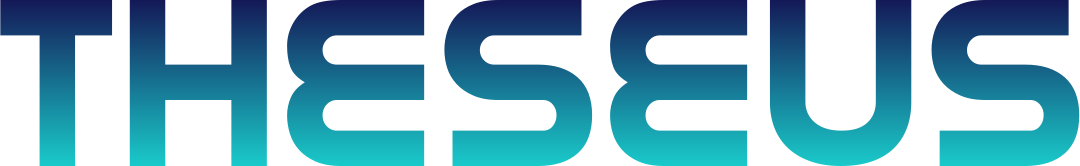

---------------
---------------

# Training on Feed Forward Neural Network (v0.1)

### PROJECT THESEUS (v0.1) - PART 4
------------------

Artash Nath, UTAT Orbit Member

-------------------

This notebook trains a very basic feed forward neural network model on the position/effect training database.

It then unnormalized the predictions to create a performance metrix over the different parameters

-------------------

<b>1. Importing Libraries</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import random
from tensorflow.keras.layers import*
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import Model
from keras.utils.vis_utils import plot_model

-----------------------------
<b>2. Load Training Data</b>

In [2]:
train_inputs = np.load('./DATA/ML DATA/Train_Inputs.npy')
train_outputs = np.load('./DATA/ML DATA/Train_Outputs.npy')

test_inputs = np.load('./DATA/ML DATA/Test_Inputs.npy')
test_outputs = np.load('./DATA/ML DATA/Test_Outputs.npy')

In [3]:
print("Train Inputs : {}".format(np.shape(train_inputs)))
print("Train Outputs : {}".format(np.shape(train_outputs)))
print()
print("Test Inputs : {}".format(np.shape(test_inputs)))
print("Test Outputs : {}".format(np.shape(test_outputs)))

Train Inputs : (21600000, 6)
Train Outputs : (21600000, 6)

Test Inputs : (5400000, 6)
Test Outputs : (5400000, 6)


-----------------------------
<b>3. Creating Neural Network</b>

In [4]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='relu'))
model.add(Dense(6))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


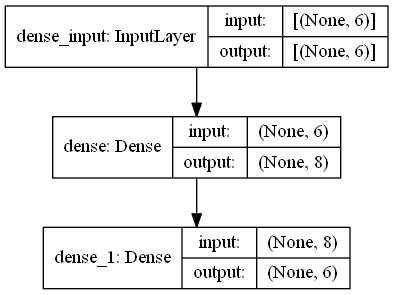

In [6]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

-----------------------------
<b>4. Training Neural Network</b>

In [7]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
history1 = model.fit(train_inputs, train_outputs, epochs=30, batch_size=1024, validation_data = (test_inputs, test_outputs))

Epoch 1/30
21094/21094 [==============================] - 59s 3ms/step - loss: 0.0044 - val_loss: 5.7950e-06
Epoch 2/30
21094/21094 [==============================] - 55s 3ms/step - loss: 5.3741e-06 - val_loss: 5.1931e-06
Epoch 3/30
21094/21094 [==============================] - 56s 3ms/step - loss: 4.9597e-06 - val_loss: 4.8389e-06
Epoch 4/30
21094/21094 [==============================] - 56s 3ms/step - loss: 4.7494e-06 - val_loss: 4.6243e-06
Epoch 5/30
21094/21094 [==============================] - 55s 3ms/step - loss: 4.5905e-06 - val_loss: 4.3933e-06
Epoch 6/30
21094/21094 [==============================] - 55s 3ms/step - loss: 4.4661e-06 - val_loss: 4.3517e-06
Epoch 7/30
21094/21094 [==============================] - 54s 3ms/step - loss: 4.3794e-06 - val_loss: 4.6165e-06
Epoch 8/30
21094/21094 [==============================] - 54s 3ms/step - loss: 4.3316e-06 - val_loss: 4.2943e-06
Epoch 9/30
21094/21094 [==============================] - 56s 3ms/step - loss: 4.3091e-06 - val_loss

In [8]:
#model.load_weights('model1.h5')

------------
<b>5. Evaluation of Neural Network</b>

In [9]:
model.evaluate(test_inputs, test_outputs)

168750/168750 [==============================] - 231s 1ms/step - loss: 4.3447e-06


4.344695753388805e-06

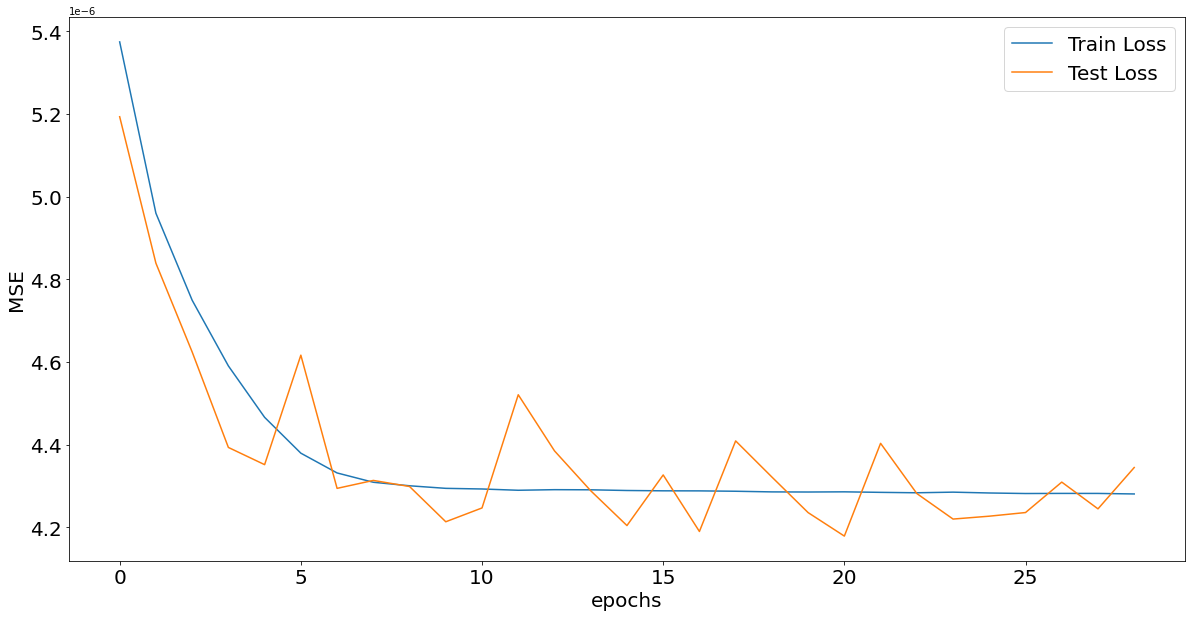

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(history1.history['loss'][1:])
plt.plot(history1.history['val_loss'][1:])
plt.xlabel('epochs', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(['Train Loss', 'Test Loss'], fontsize=20)

In [23]:
effect_minimums = np.load('./DATA/NORMALIZATION/effect_minimums.npy')
effect_maximums = np.load('./DATA/NORMALIZATION/effect_maximums.npy')

def unnormalize(data):
    return (data*(effect_maximums - effect_minimums))+effect_minimums

validation_data = (test_inputs, test_outputs)
assert (len(validation_data) == 2)
assert (len(validation_data[0]) == len(validation_data[1]))
validation_inputs = validation_data[0]
validation_outputs = validation_data[1]

start = time.perf_counter()
predictions = model.predict(validation_inputs)
end = time.perf_counter()
pred_time = abs(end-start)*1000
time_per_sample = pred_time/len(validation_inputs)
print("Predicted {} samples at {} ms/sample".format(len(validation_inputs), time_per_sample))


errors_all = abs(validation_outputs - predictions)
error_array = [np.mean(errors_all[:,0]), np.mean(errors_all[:,1]), np.mean(errors_all[:,2]), 
               np.mean(errors_all[:,3]), np.mean(errors_all[:,4]), np.mean(errors_all[:,5])]


errors_unormalized = abs(unnormalize(validation_outputs) - unnormalize(predictions))
errors_unormalized_array = [np.mean(errors_unormalized[:,0]), np.mean(errors_unormalized[:,1]), 
                            np.mean(errors_unormalized[:,2]), np.mean(errors_unormalized[:,3]), 
                            np.mean(errors_unormalized[:,4]), np.mean(errors_unormalized[:,5])]

normalized_mean =[np.mean(abs(unnormalize(predictions))[:,0]), np.mean(abs(unnormalize(predictions))[:,1]), 
                  np.mean(abs(unnormalize(predictions))[:,2]), np.mean(abs(unnormalize(predictions))[:,3]),
                  np.mean(abs(unnormalize(predictions))[:,4]), np.mean(abs(unnormalize(predictions))[:,5])]

Predicted 5400000 samples at 0.015353423851851808 ms/sample


In [18]:
model.load_weights('model1.h5')

In [24]:
errors_unormalized_array

[0.2595471615350305,
 7.296390644630768,
 0.4632949628493633,
 0.03837123557553522,
 0.037835561896890885,
 0.004542085852326376]

In [25]:
normalized_mean

[4818.010858533021,
 4819.64933732985,
 516.4926067802155,
 5.3134090481011835,
 5.310262968846056,
 0.5701715286177252]

In [ ]:
model.save('model2.h5')